In [1]:
import sys
import os
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

from statistics import mean 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

import telomere_methods as telo_m

### find the "identity plot" referenced by lynn... a way to explore / quantify correlation between in vitro vs. in vivo telo lengths 
### it may also be called a pair plot ? ... 
### make boxen plot with timepoint on x, y axis is each individual 
### i.e have a 2x2 subplot, where each subplot is a timepoint, & each box is a patient's individual telomere length 
### do identity plot (correlation plot? pair plot?) for telos vs. total & individual types of chromosome aberraitons 

In [2]:
all_patients_dict = telo_m.generate_dictionary_from_TeloLength_and_Chr_aberr_Data('..')

SW9A non irrad.xlsx data extraction in progress..
BJ1 for SW9_.xlsx data extraction in progress..
SW11A non irrad.xlsx data extraction in progress..
BJ1 for SW15_.xlsx data extraction in progress..
SW6A non irrad.xlsx data extraction in progress..
SW6A irrad @ 4 Gy.xlsx data extraction in progress..
SW8B.xlsx data extraction in progress..
SW14A irrad @ 4 Gy.xlsx data extraction in progress..
SW8A irrad @ 4 Gy.xlsx data extraction in progress..
SW5A irrad @ 4 Gy.xlsx data extraction in progress..
SW8C.xlsx data extraction in progress..
SW1A non irrad.xlsx data extraction in progress..
BJ1 for SW11_.xlsx data extraction in progress..
SW16A non irrad.xlsx data extraction in progress..
BJ1 for SW13_.xlsx data extraction in progress..
BJ-hTERT for SW9_.xlsx data extraction in progress..
BJ1 for SW14_.xlsx data extraction in progress..
SW9B.xlsx data extraction in progress..
BJ1 for SW8_.xlsx data extraction in progress..
SW_1_ok_3_C_.xlsx data extraction in progress..


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:2275: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


SW3A irrad @ 4 Gy.xlsx data extraction in progress..
SW11A irrad @ 4 Gy.xlsx data extraction in progress..
BJ1 for SW16_.xlsx data extraction in progress..
BJ1 for SW12_.xlsx data extraction in progress..
SW8A non irrad.xlsx data extraction in progress..
BJ-hTERT for SW8_.xlsx data extraction in progress..
SW10A non irrad.xlsx data extraction in progress..
SW12A irrad @ 4 Gy.xlsx data extraction in progress..
SW9C.xlsx data extraction in progress..
BJ1 for SW10_.xlsx data extraction in progress..
SW7A non irrad.xlsx data extraction in progress..
SW1A irrad @ 4 Gy.xlsx data extraction in progress..
SW13A irrad @ 4 Gy.xlsx data extraction in progress..
SW1B.xlsx data extraction in progress..
BJ-hTERT for SW6_.xlsx data extraction in progress..
SW13B.xlsx data extraction in progress..
BJ1 for SW2_.xlsx data extraction in progress..
SW2A non irrad.xlsx data extraction in progress..
SW5C.xlsx data extraction in progress..
SW15C.xlsx data extraction in progress..
SW7C.xlsx data extraction in

In [6]:
def generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict, graph_option='no graphs'):

    data = []
    print('To display graphs pass the value "yes graphs" to the functions argument "graph_option"',
          'otherwise option="no graphs"')

    for i in range(1,17):
        if str(i) in all_patients_dict.keys():
            for sample in sorted(all_patients_dict[str(i)].keys()):
                telos = all_patients_dict[str(i)][sample][0]
                # chr = all_patients_dict[str(i)[timepoint][1]
                chr_d = 'chr data'
                working_status = 'IT WORKS PEGGY <333'
            
        
                if 'hTERT' in sample:
                    #average of all hTERT samples is 79.9762
                    #CF = correction factor
                    hTERT_avg = 79.9762
                    hTERT_CF1 = hTERT_avg / telos['Mean Individ Telos'].mean()
                
                elif 'BJ1' in sample:
                    #average of all BJ1 samples is 69.5515
                    #CF = correction factor
                    BJ1_avg = 69.5515
                    BJ1_CF2 = BJ1_avg / telos['Mean Individ Telos'].mean()
   
                    CF_mean = (hTERT_CF1 + BJ1_CF2) / 2
            
                elif 'non irrad' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_A_nonRAD_name = sample
                    SW_A_nonRAD = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    telos_samp = telos_samp.iloc[:,0]
                    data.append([sample[num:num2], '1 ' + 'non irrad', telos_samp.multiply(CF_mean), chr_d, working_status])

                elif 'irrad @ 4 Gy' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_A_irrad4Gy_name = sample
                    SW_A_irrad4Gy = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    telos_samp = telos_samp.iloc[:,0]
                    data.append([sample[num:num2], '2 ' + 'irrad @ 4 Gy', telos_samp.multiply(CF_mean), chr_d, working_status])

                elif 'B' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_B_name = sample
                    SW_B = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    telos_samp = telos_samp.iloc[:,0]
                    data.append([sample[num:num2], '3 ' + 'B', telos_samp.multiply(CF_mean), chr_d, working_status])
                    
                elif 'C' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_C_name = sample
                    SW_C = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    telos_samp = telos_samp.iloc[:,0]
                    data.append([sample[num:num2], '4 ' + 'C', telos_samp.multiply(CF_mean), chr_d, working_status])

                else:
                    print('error with making dataframe from dict..')
                    print(sample)
                    continue
            
            if option == 'yes graphs':
                
                SW_A_nonRAD_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_nonRAD, 'rsamp')
                SW_A_irrad4Gy_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_irrad4Gy, 'rsamp')
                SW_B_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_B, 'rsamp')
                SW_C_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_C, 'rsamp')

                SW_A_nonRADarray = SW_A_nonRAD_samp.to_numpy()
                SW_A_irrad4Gyarray = SW_A_irrad4Gy_samp.to_numpy()
                SW_Barray = SW_B_samp.to_numpy()
                SW_Carray = SW_C_samp.to_numpy()


                n_bins = 50
                fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=False, figsize=(20, 13))

                histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_nonRAD_samp, SW_A_nonRADarray, SW_A_nonRAD_name, 0, 0)
                histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_irrad4Gy_samp, SW_A_nonRADarray, SW_A_irrad4Gy_name, 0, 1)
                histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_B_samp, SW_A_nonRADarray, SW_B_name, 1, 0)
                histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_C_samp, SW_A_nonRADarray, SW_C_name, 1, 1)

                if 'BJ1' not in sample and 'hTERT' not in sample:
                    plt.savefig(f'SW{sample[2]}_histogram.pdf')
                plt.show()
            
            else:
                continue
                
    
    all_patients_df = pd.DataFrame(data, columns=['patient id', 'timepoint', 'telo data', 'chr data', 'status'])
    all_patients_df['patient id'] = all_patients_df['patient id'].astype('int')
    all_patients_df = all_patients_df.sort_values(by=['patient id', 'timepoint'], ascending=True, axis=0).reset_index(drop=True)
    all_patients_df['telo means'] = all_patients_df['telo data'].apply(lambda row: np.mean(row))
    
    all_patients_df['Q1'] = 'telos nonRAD Q1 <0.25'
    all_patients_df['Q2-3'] = 'telos nonRAD Q2-3 >0.25 & <0.75'
    all_patients_df['Q4'] = 'telos nonRAD Q4 >0.75'

    return all_patients_df
                

In [5]:
sns.set_style(style="darkgrid")
all_patients_df = telo_m.generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict)

To display graphs pass the value "yes graphs" to the functions argument "option" otherwise option="no graphs"


In [6]:
all_patients_df.head(4)

,patient id,timepoint,telo data,chr data,status,telo means,Q1,Q2-3,Q4
0,1,1 non irrad,0 70.743017 1 127.759776 2 ...,chr data,IT WORKS PEGGY <333,84.796738,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
1,1,2 irrad @ 4 Gy,0 77.078212 1 114.033519 2 ...,chr data,IT WORKS PEGGY <333,90.975987,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
2,1,3 B,0 148.877095 1 173.162011 2 ...,chr data,IT WORKS PEGGY <333,116.780229,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
3,1,4 C,0 88.692737 1 82.357542 2 ...,chr data,IT WORKS PEGGY <333,99.346663,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75


In [11]:
### LOOP THROUGH DATAFRAME FOR EACH PATIENT, ESTABLISH BASELINE QUARTILES FOR INDIVIDUAL TELOMERES USING NON IRRAD 
### SAMPLE TIMEPOINT.. THEN DETERMINES FOR EACH TIMEPOINT (irrad 4 Gy, B, C) HOW MANY TELOMERES REMAIN IN THOSE 
### QUARTILES... FILLS OUT Q1, Q2-3, Q4 COLUMNS..

def calculate_apply_teloQuartiles_dataframe(all_patients_df):

    for i, row in all_patients_df.iterrows():
        if 'non irrad' in row[1]:
            nonRAD = row[2]
            all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, nonRAD))

        elif 'irrad @ 4 Gy' in row[1]:
            all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))

        elif 'B' in row[1]:
            all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))

        elif 'C' in row[1]:
            all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))

        else:
            print('unknown label in row[1] of the all patients df.. please check patient timepoint names')
            
    return all_patients_df

all_patients_df = calculate_apply_teloQuartiles_dataframe(all_patients_df)
all_patients_df.head()

NameError: name 'quartile_cts_rel_to_df1' is not defined

In [29]:
### MELT Q1, Q2-3, Q4 COLUMNS INTO ONE.. the relative Q && make new column Q freq counts for it

melted_all_patients_df = pd.melt(
    all_patients_df,
    id_vars = [col for col in all_patients_df.columns if col != 'Q1' and col != 'Q2-3' and col != 'Q4'],
    var_name='relative Q',
    value_name='Q freq counts')

### relative Q refers to which quartile, ala Q1 <0.25, Q2-3 >0.25 & <0.75, Q4 > 0.75


### Q FREQ COUNTS
### counts the number of individual telomeres for each timepoint within the quartiles established 
### by the non irradiated timepoint for each patient 
melted_all_patients_df['Q freq counts'] = melted_all_patients_df['Q freq counts'].astype('float64')

# melted_all_patients_df.dtypes
melted_all_patients_df.head(4)

,patient id,timepoint,telo data,chr data,status,telo means,relative Q,Q freq counts
0,1,1 non irrad,0 54.905028 1 53.849162 2 ...,chr data,IT WORKS PEGGY <333,84.796738,Q1,1195.0
1,1,2 irrad @ 4 Gy,0 65.463687 1 167.882681 2 ...,chr data,IT WORKS PEGGY <333,90.975987,Q1,724.0
2,1,3 B,0 155.212290 1 104.530726 2 ...,chr data,IT WORKS PEGGY <333,116.780229,Q1,231.0
3,1,4 C,0 60.184357 1 74.966480 2 ...,chr data,IT WORKS PEGGY <333,99.346663,Q1,372.0


In [69]:
pivot_all_patients_df = all_patients_df.pivot(index='patient id', columns='timepoint', values='telo means')
pivot_all_patients_df = pivot_all_patients_df.drop(13)

print(pivot_all_patients_df.shape)
pivot_all_patients_df.head(4)


(14, 4)


timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C
patient id,,,,
1,84.796738,90.975987,116.780229,99.346663
2,119.774143,133.199629,159.828115,108.915685
3,83.351204,87.295754,101.433049,95.669819
5,85.506373,113.096219,118.340987,97.832439


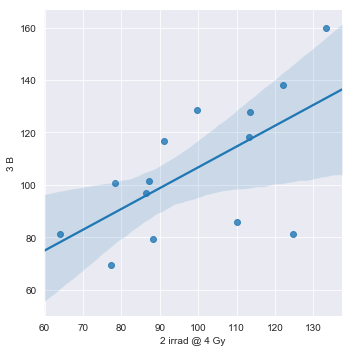

In [36]:
sns.lmplot(x='2 irrad @ 4 Gy', y='3 B', fit_reg=True, data=pivot_all_patients_df)
# sns.lmplot(x='2 irrad @ 4 Gy', y='4 C', fit_reg=True, data=pivot_all_patients_df)
# sns.lmplot(x='3 B', y='4 C', fit_reg=True, data=pivot_all_patients_df)

In [40]:
### LINEAR REGRESSION BETWEEN ALL TELO MEANS IN VITRO IRRAD VS. IN VIVO

X = pivot_all_patients_df[['1 non irrad', '2 irrad @ 4 Gy', '3 B']]
# X = np.log(X)

y = pivot_all_patients_df['4 C']
# y = np.log(y)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# # # # Print out the statistics
model.summary()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    4 C   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     136.9
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           5.45e-09
Time:                        22:37:48   Log-Likelihood:                -58.794
No. Observations:                  14   AIC:                             123.6
Df Residuals:                      11   BIC:                             125.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
1 non irrad        0.7532      0.840      0.897      0.389      -1.095       2.601
2 irrad @ 4 Gy    -0.2229      0.884     -0.252      0.806      -2.170       1.724
3 B                0.4720      0.247      1.911      0.082      -0.072       1.016
==============================================================================
Omnibus:                        3.950   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.504
Skew:                           0.683   Prob(JB):                        0.471
Kurtosis:                       3.844   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
#I really want to do a proper linear regression on the individual telos...tough getting it in the right format
#here i'm trying to break out the patient ids/timepoints for the individual telo data..

#objective is dataframe for only individual telos

#drop patient 13, missing 3 mth post rad ther timepoint
all_patients_df_copy = all_patients_df.drop([44, 45, 46], axis=0)

#taking all_patients_df, removing the index & making a multi index of patient id and timepoint
individ_telos_cols = all_patients_df_copy.reindex().set_index(['patient id', 'timepoint']) 

#removing unnecessary columns
individ_telos_cols.drop(['chr data', 'status', 'telo means', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)

#exploding the series containing the individual telos
explode_individ_telos_cols = individ_telos_cols['telo data'].apply(pd.Series)

#transpose!
explode_individ_telos_cols = explode_individ_telos_cols.reset_index(level=['patient id']).T

print(explode_individ_telos_cols.shape)
explode_individ_telos_cols.head(5)


(4601, 56)


timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,...,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C
patient id,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,...,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,16.000000,16.000000,16.000000,16.000000
0,54.905028,65.463687,155.212290,60.184357,184.875634,102.271627,192.742682,131.773058,54.395239,48.567178,...,82.831225,103.033962,66.992514,59.225266,65.050702,150.490429,64.182738,58.743523,47.865093,67.446267
1,53.849162,167.882681,104.530726,74.966480,155.374203,147.507155,112.105438,101.288246,108.790479,138.902129,...,141.419164,106.064373,76.701574,143.694087,88.352445,45.632582,54.392151,34.810976,63.094895,117.864995
2,83.413408,92.916201,131.983240,73.910614,173.075062,183.892253,237.978210,132.756439,48.567178,111.704509,...,86.871772,79.800814,76.701574,66.021608,52.428924,143.694087,71.797639,57.655680,82.676069,88.115284
3,76.022346,123.536313,88.692737,107.698324,121.939248,126.856153,152.424060,141.606869,33.025681,83.535546,...,117.175879,120.206290,69.905232,128.159591,59.225266,145.635899,64.182738,45.689407,54.392151,79.412540


In [46]:
explode_individ_telos_cols['1 non irrad'].head(4)

timepoint,1 non irrad,1 non irrad,1 non irrad,1 non irrad,1 non irrad,1 non irrad,1 non irrad,1 non irrad,1 non irrad,1 non irrad,1 non irrad,1 non irrad,1 non irrad,1 non irrad,1 non irrad
patient id,1.000000,2.000000,3.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000
0,54.905028,184.875634,54.395239,85.323417,57.537738,92.650375,94.689564,66.231864,221.866736,87.444277,62.097326,90.260815,87.881909,66.992514,64.182738
1,53.849162,155.374203,108.790479,93.260479,75.394278,76.880098,166.782756,59.207272,106.899427,70.551633,147.850777,61.864154,58.587939,76.701574,54.392151
2,83.413408,173.075062,48.567178,49.606638,86.306608,136.018636,82.853369,121.425084,127.069131,120.235881,98.567185,122.714142,55.557529,76.701574,71.797639


In [59]:
### linear regression between ALL INDIVIDUAL TELOMERES of in vitro irrad vs. in vivo irrad
# for all patients, try the mean telo length. afterwards
# go read about repeated measures model 

from sklearn import preprocessing

#log transform increases R-squared from ~.8 --> .9 ...

X = explode_individ_telos_cols['2 irrad @ 4 Gy'].iloc[1:].values.reshape(-1,1)
y = explode_individ_telos_cols['3 B'].iloc[1:].values.reshape(-1,1)

# X = np.log(X)
# y = np.log(y)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# # # # Print out the statistics
# model.summary()

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = explode_individ_telos_cols[['1 non irrad', '2 irrad @ 4 Gy', '3 B']].iloc[1:].values.reshape(64400, 3)
y = explode_individ_telos_cols['4 C'].iloc[1:].values.reshape(-1, )

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

predict_y = model.predict(X_valid)
mean_a_error = mean_absolute_error(predict_y, y_valid)
print(mean_a_error)

In [151]:
from xgboost import XGBRegressor

model_XGB = XGBRegressor(random_state=0)

# Fit the model
model_XGB.fit(X_train, y_train)
XGB_predict_y = model_XGB.predict(X_valid)
XGB_mean_a_error = mean_absolute_error(XGB_predict_y, y_valid)
print(XGB_mean_a_error)

[23:52:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
26.03074399156802


In [152]:
exploded_telos_all_patients_df.head()

X = exploded_telos_all_patients_df['telo data exploded'][exploded_telos_all_patients_df['telo data exploded'] != '4 C']
y = exploded_telos_all_patients_df['telo means'].values.reshape(-1, )

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)
model_XGB2 = XGBRegressor(random_state=0)
model_XGB2.fit(X_train, y_train)
XGB_predict_y = model_XGB2.predict(X_valid)
XGB_mean_a_error = mean_absolute_error(XGB_predict_y, y_valid)
print(XGB_mean_a_error)

/usr/local/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


[23:53:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBoostError: [23:53:20] src/objective/regression_obj.cu:65: Check failed: preds.Size() == info.labels_.Size() (1 vs. 203550) : labels are not correctly providedpreds.size=1, label.size=203550
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000165886579 dmlc::LogMessageFatal::~LogMessageFatal() + 57
  [bt] (1) 2   libxgboost.dylib                    0x0000000165913d81 xgboost::obj::RegLossObj<xgboost::obj::LinearSquareLoss>::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*) + 625
  [bt] (2) 3   libxgboost.dylib                    0x00000001658827ef xgboost::LearnerImpl::UpdateOneIter(int, xgboost::DMatrix*) + 1311
  [bt] (3) 4   libxgboost.dylib                    0x00000001658a1314 XGBoosterUpdateOneIter + 180
  [bt] (4) 5   _ctypes.cpython-37m-darwin.so       0x000000010a63c377 ffi_call_unix64 + 79
  [bt] (5) 6   ???                                 0x00007ffee8282a70 0x0 + 140732793367152



In [143]:
# exploded_telos_all_patients_df['telo data exploded'][exploded_telos_all_patients_df['telo data exploded'] != '4 C']

KeyError: True

In [111]:
#two ways to make X contain all individ telos from first 3 timepoints for random f
#pull cols out directly from df, reshape .. fit analyze

#or.. pull out individually, then combine into 1 df? hmm

explode_individ_telos_cols_drop = explode_individ_telos_cols

X = explode_individ_telos_cols[['1 non irrad', '2 irrad @ 4 Gy', '3 B']].iloc[1:].values.reshape(64400, 3)
print(X.shape)
y = explode_individ_telos_cols['4 C'].iloc[1:].values.reshape(-1, 1)
print(y.shape)

print(explode_individ_telos_cols.shape)

(64400, 3)
(64400, 1)
(4601, 56)


In [60]:
# PROBLEM.. unable to plot categorical values against lists of values, i.e directly plotting timepoints agaisnt the
# individual telomere length measurements stored in each row... 

# solution? explode individual telomere length measurement lists
# so that EACH individual telomere is associated with it's corresponding timepoints.. we'll go from a dataframe with
# 59 rows to >277,000.. pretty cool!

explode_telos_raw = all_patients_df['telo data'].apply(pd.Series)

# explode_melted_telos_raw = melted_all_patients_df['telo data'].apply(pd.Series)
# explode_telos.head(4)

In [62]:
exploded_telos_all_patients_df = (explode_telos_raw
    .merge(all_patients_df, right_index = True, left_index = True)
    .drop(['telo data', 'Q1', 'Q2-3', 'Q4'], axis = 1)
    .melt(id_vars = ['patient id', 'timepoint', 'chr data', 'status', 'telo means'], value_name = "telo data exploded") 
    .drop("variable", axis = 1)
    .dropna())

#this melt function is yielding [array] values in the telo data column for 
#positions 271400 onwards to 271576 ... very strange! no idea why it's doing that..
# at first i didnt drop the 'telo data'... i think it was being concatenated or something with the exploded telos.. not sure...

##### SOLVED ##### !

#the strange behavior observed w/ melting occurred from not properly controlling columns w/ id vars!
#thankfully has been resolved :) 


# FIXED :) 

In [80]:
print(exploded_telos_all_patients_df.shape)
exploded_telos_all_patients_df.head(4)

(271400, 6)


,patient id,timepoint,chr data,status,telo means,telo data exploded
0,1,1 non irrad,chr data,IT WORKS PEGGY <333,84.796738,54.905028
1,1,2 irrad @ 4 Gy,chr data,IT WORKS PEGGY <333,90.975987,65.463687
2,1,3 B,chr data,IT WORKS PEGGY <333,116.780229,155.212290
3,1,4 C,chr data,IT WORKS PEGGY <333,99.346663,60.184357


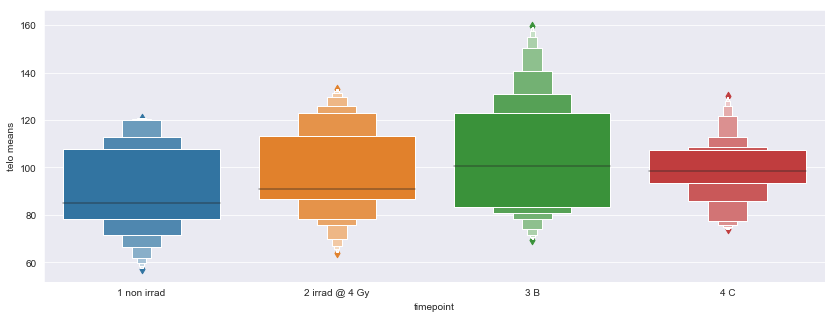

In [63]:
fig = plt.figure(figsize=(14,5))
sns.boxenplot(x='timepoint',y='telo means', data=all_patients_df)

### Telomere means of all patients grouped by timepoint

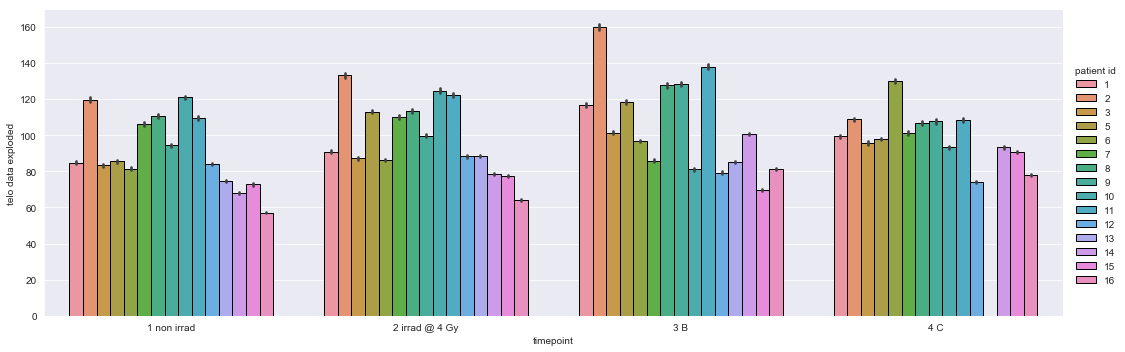

In [226]:
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
sns.catplot(x='timepoint', y='telo data exploded', hue='patient id', kind='bar', height=5, aspect=3, data=exploded_telos_all_patients_df)

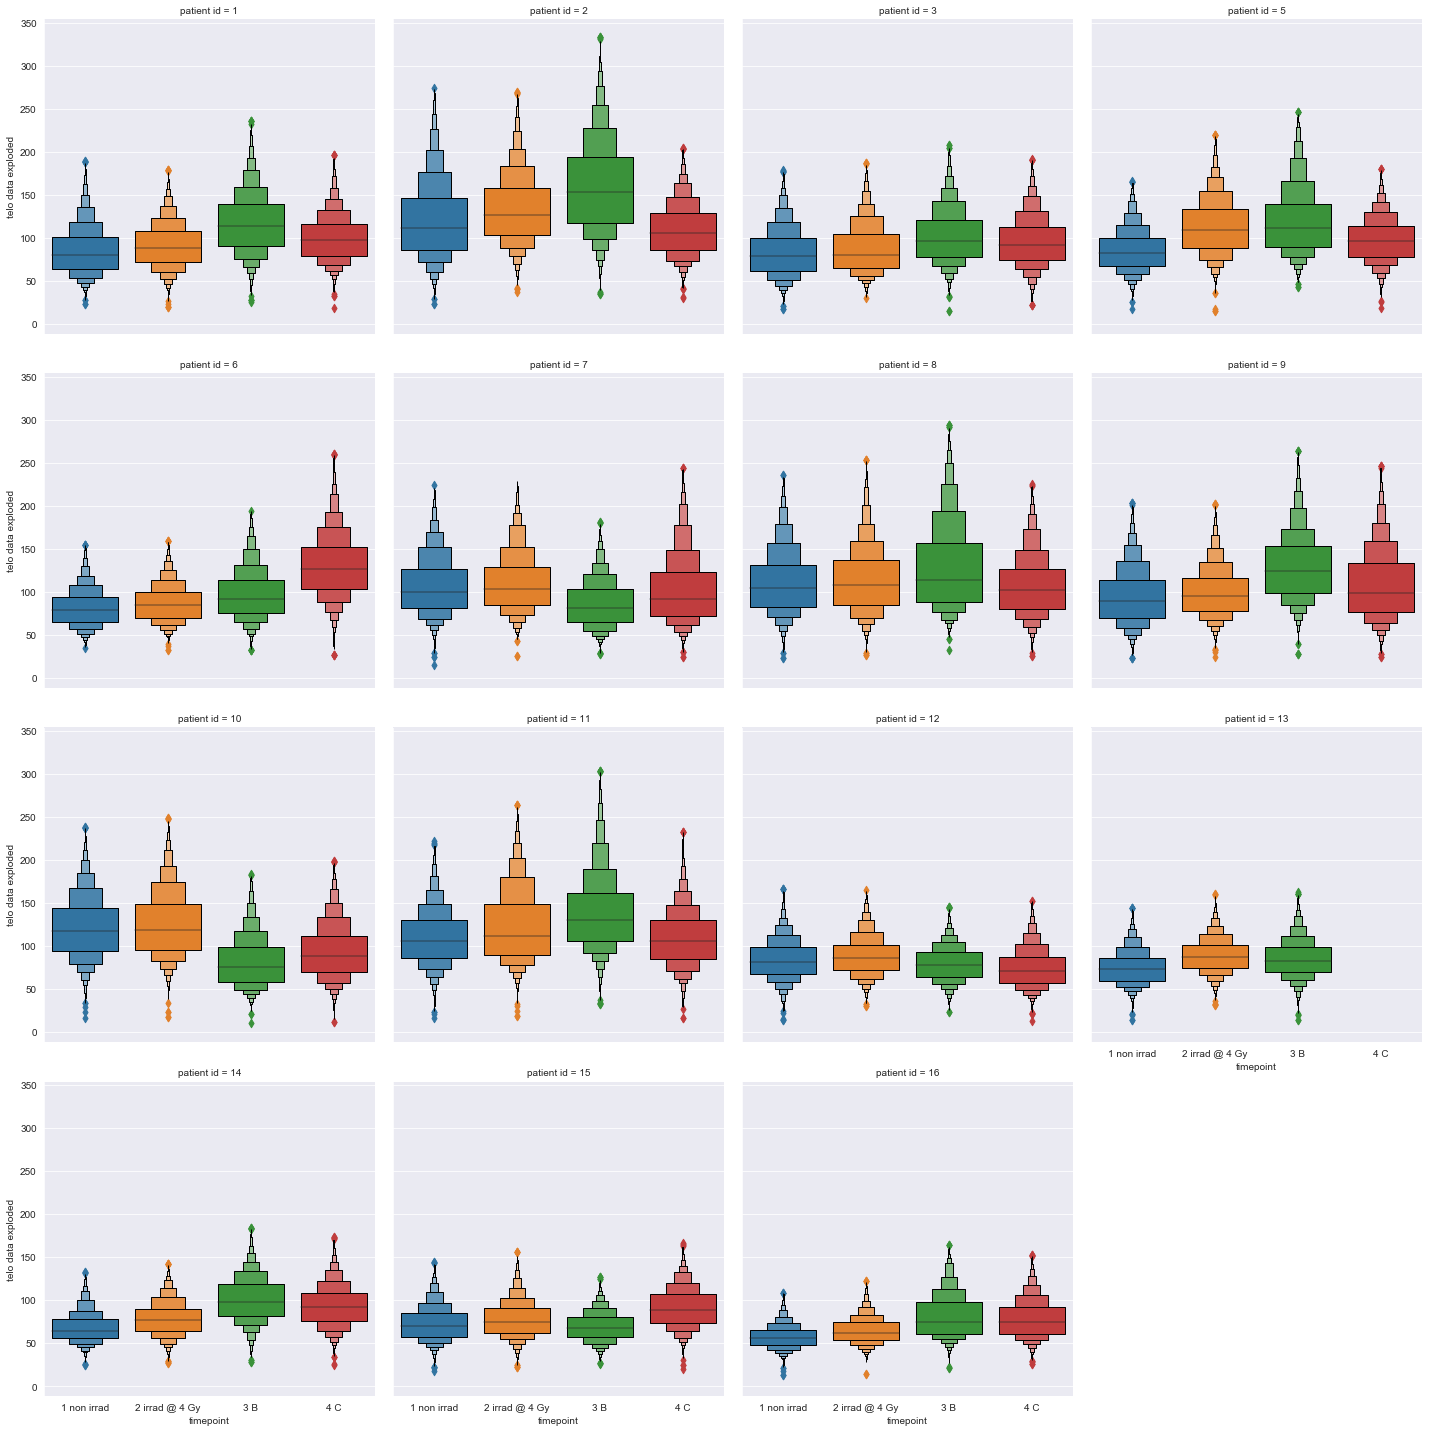

In [203]:
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
sns.catplot(x='timepoint', y='telo data exploded', col='patient id', col_wrap=4, kind='boxen', data=exploded_telos_all_patients_df)

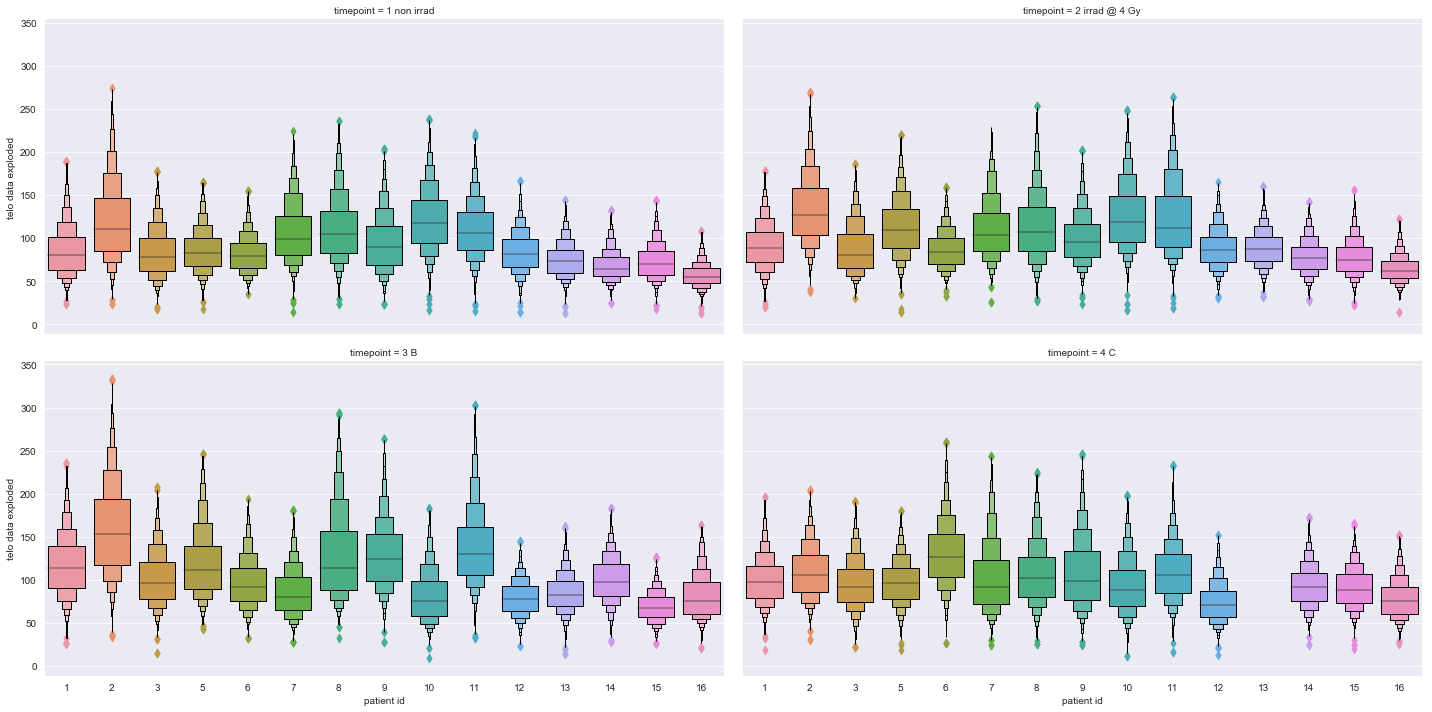

In [209]:
sns.catplot(x='patient id', y='telo data exploded', col='timepoint', height=5, aspect=2, col_wrap=2, kind='boxen', data=exploded_telos_all_patients_df)
# plt.savefig(f'lynn suggestion.pdf')

Text(0, 0.5, 'Individual Telos Within Pre-Rad Therapy Time point Quartiles')

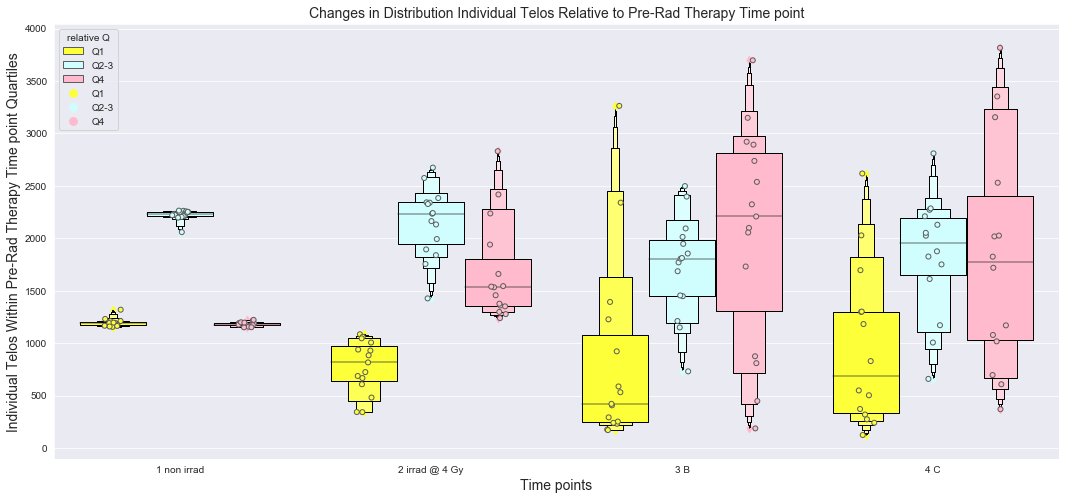

In [229]:
fig = plt.figure(figsize=(18,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.stripplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=1, color="black", dodge=True)

# ax.set(xlabel='TESTING', ylabel='common ylabel')
# fig.ax.set(xlabel='ASD')

ax=fig.gca()
ax.set_title('Changes in Distribution Individual Telos Relative to Pre-Rad Therapy Time point', fontsize=14)
ax.set_xlabel('Time points', fontsize=14)
ax.set_ylabel('Individual Telos Within Pre-Rad Therapy Time point Quartiles', fontsize=14)

### Q freq counts represents the number of individual telomeres at each timepoint
### within the quartiles established by the non irrad timepoint for each patient

In [74]:
### COULD I REMOVE NON RAD TIMEPOINT FROM ANALYSIS?

q = melted_all_patients_df['Q freq counts']
tp = melted_all_patients_df['timepoint']
rq = melted_all_patients_df['relative Q']

# relq = melted_all_patients_df['relative Q']

model = ols('q ~ C(tp)*C(rq)', melted_all_patients_df).fit()

#with Q frequency counts as the dependent variable
#timepoint/relative Q are the inpdependent categorical values

#asking.. does the timepoint alone affect Q freq counts?
#no.. 

# print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
# model.summary()

In [71]:
melted_all_patients_df_drop_non_irrad = melted_all_patients_df[melted_all_patients_df['timepoint'] != '1 non irrad']
melted_all_patients_df_drop_non_irrad.shape

(132, 8)

In [77]:
q = melted_all_patients_df['Q freq counts']
tp = melted_all_patients_df['timepoint']
relq = melted_all_patients_df['relative Q']

model = ols('q ~ C(tp)*C(relq)', melted_all_patients_df).fit()

#with Q frequency counts as the dependent variable
#timepoint & which quartile are the inpdependent categorical values

#asking.. does the timepoint & relative quartile affect Q freq counts?

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
model.summary()

Overall model F( 11, 165) =  10.695, p =  0.0000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     10.69
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           1.01e-14
Time:                        22:58:35   Log-Likelihood:                -1381.4
No. Observations:                 177   AIC:                             2787.
Df Residuals:                     165   BIC:                             2825.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                1196.2000    158.610      7.542      0.000     883.034    1509.366
C(tp)[T.2 irrad @ 4 Gy]                  -421.6667    224.308     -1.880      0.062    -864.550      21.217
C(tp)[T.3 B]                             -365.9333    224.308     -1.631      0.105    -808.817      76.950
C(tp)[T.4 C]                             -243.7714    228.278     -1.068      0.287    -694.494     206.951
C(relq)[T.Q2-3]                          1026.6667    224.308      4.577      0.000     583.783    1469.550
C(relq)[T.Q4]                             -15.2667    224.308     -0.068      0.946    -458.150     427.617
C(tp)[T.2 irrad @ 4 Gy]:C(relq)[T.Q2-3]   353.6667    317.219      1.115      0.267    -272.665     979.999
C(tp)[T.3 B]:C(relq)[T.Q2-3]             -132.0667    317.219     -0.416      0.678    -758.399     494.265
C(tp)[T.4 C]:C(relq)[T.Q2-3]             -144.5238    322.834     -0.448      0.655    -781.942     492.895
C(tp)[T.2 irrad @ 4 Gy]:C(relq)[T.Q4]     911.3333    317.219      2.873      0.005     285.001    1537.665
C(tp)[T.3 B]:C(relq)[T.Q4]               1229.8667    317.219      3.877      0.000     603.535    1856.199
C(tp)[T.4 C]:C(relq)[T.Q4]                875.8381    322.834      2.713      0.007     238.420    1513.256
==============================================================================
Omnibus:                       26.078   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.311
Skew:                           0.586   Prob(JB):                     1.47e-15
Kurtosis:                       5.809   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(tp),4.600555e-22,3.0,5.481466e-28,1.000000e+00
C(relq),2.428721e+07,2.0,4.340656e+01,1.131978e-13
C(tp):C(relq),6.844244e+06,6.0,4.077387e+00,1.227585e-03
Residual,2.350020e+07,84.0,NaN,NaN


In [ ]:
# def generate_dictionary_from_TeloLength_and_Chr_aberr_Data(patharg):

#     """
#     opens raw telomere length count excel files from imageJ analyses and
#     extracts the individual mean telomere lengths to make histograms;
#     opens chromosome rearrangement frequency files and extracts data
#     both telos & chr rearrangement frequencies are stored as values to their
#     sample timepoint keys, which themselves are values to patient id# key

#     i.e the data structure is:

#     dict = {
#     patient_IDnumber = 
#     {SW#A non irrad: [telos data, chr aberr data], 
#     SW#A irrad @ 4 Gy: [telos data, chr aberr data]},

#     etc.
#     }

#     i.e:

#     all_patients_dict = {
#     '1' = {
#     'SW1A non irrad': ['telomere data', 'chr aberr data'],
#     'SW1A irrad @ 4 Gy': ['telomere data', ' chr aberr data']},

#     etc. for patients 1 - 16 (less #4 missing)
#     }

#     pass the directory where the telomere length excel files (.xlsx) are located
#     """

#     all_patients_dict = {}

#     for file in os.scandir(patharg):
#         if file.name.endswith('.xlsx') and file.name.startswith('~$') == False:
        
#             try:
#                 df = pd.read_excel(file)

#             except:
#                 print('File not found..')
#                 return -1

#             print(file.name, 'data extraction in progress..') 
# #                   'it works peggy!! <3 <3 !!')
           
#             if 'chr' not in file.name:
                
#                 telo_data = extract_and_clean_telos(df, file.name)

#             else:
#                 continue

#             file = file.name.replace('.xlsx', '').rstrip()
#             data_list = []
#             file_chr = ''

            
#             num, num2 = capture_patient_sample_ID(file)

#             if 'chr' in file:
#                 file_chr = file
#                 file = file.replace('chr','').rstrip()

#             if file[num:num2] not in all_patients_dict.keys():
#                 all_patients_dict[file[num:num2]] = {file: []}

#                 if len(all_patients_dict[file[num:num2]][file]) == 0:
#                     all_patients_dict[file[num:num2]][file] = data_list
#                     if 'chr' not in file_chr:
#                         data_list.append(telo_data)
#                         data_list.sort()
#                     elif 'chr' in file_chr:
#                         data_list.append(chr_data)
#                         data_list.sort()

#                 elif len(all_patients_dict[file[num:num2]][file]) == 1:
#                     if 'chr' not in file_chr:
#                         data_list.append(telo_data)
#                         data_list.sort()
#                     elif 'chr' in file_chr:
#                         data_list.append(chr_data)
#                         data_list.sort()

#             elif file[num:num2] in all_patients_dict.keys():
#                 if file in all_patients_dict[file[num:num2]]:
#                     if 'chr' not in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(telo_data)
#                         all_patients_dict[file[num:num2]][file].sort()
#                     elif 'chr' in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(chr_data)
#                         all_patients_dict[file[num:num2]][file].sort()

#                 elif file not in all_patients_dict[file[num:num2]]:     
#                     all_patients_dict[file[num:num2]][file] = data_list
#                     if 'chr' not in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(telo_data)
#                         all_patients_dict[file[num:num2]][file].sort()
#                     elif 'chr' in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(chr_data)
#                         all_patients_dict[file[num:num2]][file].sort()
                        
#     print('completed file collection')
#     return all_patients_dict

In [23]:
# def gen_missing_values_andimpute_or_randomsampledown(n_cells, telosPercell, astro_df, option=None):
#     #if wanted to do for max. possible telomeres, just replace the subtraction with max telos
#     # print('substracts second astro from first.. equalizing second to first')

#     if astro_df.size > 4600:
#         astro_dfsampled = astro_df.sample(4600)
#         return astro_dfsampled

#     if astro_df.size > 25 and astro_df.size <= 2300:
#         missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )
#         rsampled = astro_df.sample(missing_data_difference, replace=True, random_state=28)
#         concat_ed = pd.concat([rsampled, astro_df], sort=False)
#         np.random.shuffle(concat_ed.to_numpy())
#         concat_ed.reset_index(drop=True, inplace=True)
#         return concat_ed

#     if astro_df.size > 25 and astro_df.size < 4600:
#         missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )
#         if option == 'rsamp':
#             rsampled = astro_df.sample(missing_data_difference, random_state=28)
#             concat_ed = pd.concat([rsampled, astro_df], sort=False)
#             np.random.shuffle(concat_ed.to_numpy())
#             concat_ed.reset_index(drop=True, inplace=True)
#             return concat_ed
#         else:
#             return astro_df
#     else:
#         return astro_df


In [24]:
# def histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astroDF, astroquartile, astroname, axsNUMone, axsNUMtwo):

#         astroarray = astroDF.to_numpy()

#         N, bins, patches = axs[axsNUMone,axsNUMtwo].hist(astroarray, bins=n_bins, range=(0, 400), edgecolor='black')

#         for a in range(len(patches)):
#             if bins[a] <= np.quantile(astroquartile, 0.25):
#                 patches[a].set_facecolor('#fdff38')

#             elif np.quantile(astroquartile, 0.25) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.50):
#                 patches[a].set_facecolor('#d0fefe')

#             elif np.quantile(astroquartile, 0.50) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.75):
#                 patches[a].set_facecolor('#d0fefe')

#             elif bins[a] > np.quantile(astroquartile, 0.75): 
#                 patches[a].set_facecolor('#ffbacd')


#         axs[axsNUMone,axsNUMtwo].set_title('Histogram of ' + astroname + 's Telomeres')
#         axs[axsNUMone,axsNUMtwo].set_xlabel('Bins of Individ. Telomeres')
#         axs[axsNUMone,axsNUMtwo].set_ylabel('Freqs of Individ. Telomeres')
#         axs[axsNUMone,axsNUMtwo].xaxis.set_major_locator(plt.MaxNLocator(12))

In [25]:
# def capture_patient_sample_ID(file):
#     """
#     # print(len('SW2A non irrad'),
# #       len('BJ1 for SW2_'),
# #       len('BJ-hTERT for SW2_'),
# #       len('SW10A non irrad'),
# #       len('BJ1 for SW10_'),
# #       len('BJ-hTERT for SW10_'),
# #       len('SW8B'),
# #       len('SW14B'),
# #       len('SW1A irrad @ 4 Gy'),
# #       len('SW12A irrad @ 4 Gy'))

# # 14 12 17 15 13 18 4 5 17 18

# empty = []
# for file in files:
#     num, num2 = capture_patient_sample_ID(file)
#     empty.append(file[num:num2])
# print(empty)

# # ['2', '2', '2', '10', '10', '10', '8', '15', '1', '12']
#     """

#     if len(file) == 14:
#         #it's patient id w/ 1 sample ID digit
#         num = 2
#         num2 = num + 1
#         return num, num2

#     elif len(file) == 12:
#         #it's BJ1 ctrl w/ 1 sample ID digit
#         num = 10
#         num2 = num+ 1
#         return num, num2

#     elif 'hTERT' in file and len(file) == 17:
#         #it's BJ-hTERT w/ 1 sample digit
#         num = 15
#         num2 = num + 1
#         return num, num2

#     elif len(file) == 15:
#         #it's patient id w/ 2 sample ID digits
#         num = 2
#         num2 = num + 2
#         return num, num2

#     elif len(file) == 13:
#         #it's BJ1 ctrl w/ 2 sample ID digits
#         num = 10
#         num2 = num + 2
#         return num, num2

#     elif 'hTERT' in file and len(file) == 18:
#         # it's BJ-hTERT w/ 2 sample digits
#         num = 15
#         num2 = num + 2
#         return num, num2
    
#     elif len(file) == 4:
#         #it's 2nd/3rd patient timepoint w/ 1 sample digit
#         num = 2
#         num2 = num + 1
#         return num, num2
    
#     elif len(file) == 5:
#         #it's 2nd/3rd patient timepoint w/ 2 sample digits
#         num = 2
#         num2 = num + 2
#         return num, num2
    
#     elif '4 Gy' in file and len(file) == 17:
#         # irrad @ 4 Gy 1 sample ID digit
#         num = 2
#         num2 = num + 1
#         return num, num2
    
#     elif '4 Gy' in file and len(file) == 18:
#         # irrad @ 4 Gy 2 sample ID digits
#         num = 2
#         num2 = num + 2
#         return num, num2

In [26]:
# def extract_and_clean_telos(df, file_name):

#     df.rename(columns={'Unnamed: 3':'Mean Individ Telos'}, inplace=True)
#     mean_values_of_individual_telomere_lengths = (df['Mean Individ Telos'])
#     mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.drop(labels=[5, 192, 379, 566, 753, 940, 1127, 1314,
#         1501, 1688, 1875, 2062, 2249, 2436, 2623, 2810, 2997, 3184, 3371, 3558, 3745, 3932, 4119, 4306, 4493, 4680, 4867, 5054, 5241, 5428,
#         5615, 5802, 5989, 6176, 6363, 6550, 6737, 6924, 7111, 7298, 7485, 7672, 7859, 8046, 8233, 8420, 8607, 8794, 8981, 9168])

#     mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.iloc[6:9350]
#     meantelos_str_toNaN = pd.to_numeric(mean_values_of_individual_telomere_lengths, errors='coerce')
#     mean_individual_telos_cleaned = meantelos_str_toNaN.dropna(axis=0, how='any')
#     mean_individ_df = mean_individual_telos_cleaned.to_frame(name=None)
#     mean_individ_df.reset_index(drop=True, inplace=True)
    
#     if 'BJ1' not in file_name and 'hTERT' not in file_name:
#         telo_data = mean_individ_df[(np.abs(stats.zscore(mean_individ_df)) < 3).all(axis=1)]
#         return telo_data
#     else:
#         return mean_individ_df
    
 

In [27]:
# ### FIND QUARTILES OF NON IRRAD TIMEPOINT & MAKE BASELINE..
# ### find individual telomeres below the 0.25 percentile (a), between
# ### the 0.25 & 0.75 percentile (b), & above the 0.75 percentile (c)

# def quartile_cts_rel_to_df1(df1, df2):
#     df1 = pd.DataFrame(df1)
#     df2 = pd.DataFrame(df2)
    
#     quartile_1 = df2[df2 <= df1.quantile(0.25)].count()
    
#     quartile_2_3 = df2[(df2 > df1.quantile(0.25)) & (df2 < df1.quantile(0.75))].count()

#     quartile_4 = df2[df2 >= df1.quantile(0.75)].count()
    
#     return quartile_1.values, quartile_2_3.values, quartile_4.values

In [28]:
#Work made deprecated by exploding all telos for all timepoints

### capturing all individual telomeres from in vitro irrad timepoint

from statsmodels.graphics.gofplots import qqplot

### for the qqplot to work properly.. the provided data must be a SERIES.. i.e when you previously passed one column to the qqplot,
### you received a linear qqplot (as expected), but when you passed multiple columns, the qqplot lost linearity & became a blob - why?
### this is because when passing multiple columns, the data type becomes a dataframe, rather than a series which individual columns are
### therefore, when you combine all individual telomeres into one dataframe, you need to.. make sure it's passed as a series with a reset index

### but not always..! very strange behavior.. I think the best thing to do is .. prior to doing linear regressions.. ensure that the dataframes
### are being called in the right way by examining with qqplot - & if not, adjust the call to series type rather than df

# print(type(explode_individ_telos_cols['2 irrad @ 4 Gy'].iloc[1:,0]))
# qqplot(explode_individ_telos_cols['2 irrad @ 4 Gy'].iloc[1:,0])
# plt.show()
# print(type(explode_individ_telos_cols['2 irrad @ 4 Gy'].iloc[1:,[0]]))
# qqplot(explode_individ_telos_cols['2 irrad @ 4 Gy'].iloc[1:,0])
# plt.show()
# print(type( explode_individ_telos_cols.iloc[1:,[0]] ))
# qqplot( explode_individ_telos_cols.iloc[1:,[0]] )
# plt.show()
# print(type( explode_individ_telos_cols.iloc[1:,0] ))
# qqplot(explode_individ_telos_cols.iloc[1:,0])
# plt.show()


all_in_vitro_telos = explode_individ_telos_cols['2 irrad @ 4 Gy'][1:]
all_in_vitro_telos = pd.DataFrame(all_in_vitro_telos.values.reshape(69000,1)).reset_index(drop=True)
all_in_vivo_telos = explode_individ_telos_cols['3 B'][1:]
all_in_vivo_telos = pd.DataFrame(all_in_vivo_telos.values.reshape(69000,1)).reset_index(drop=True)

# print(type(all_in_vitro_telos.iloc[:,[0]]))
# qqplot(all_in_vitro_telos.iloc[:,[0]], line='s')
# plt.show()

# print(type(all_in_vitro_telos.iloc[:,0]))
# qqplot(all_in_vitro_telos.iloc[:,0], line='s')
# # plt.show()

# print(type(all_in_vivo_telos.iloc[:,0]))
# qqplot(all_in_vivo_telos.iloc[:,0], line='s')
# plt.show()

concat_vitro_vivo = pd.concat([all_in_vitro_telos, all_in_vivo_telos], axis=1)
concat_vitro_vivo.columns = ['in vitro telos', 'in vivo telos']
concat_vitro_vivo.columns

# qqplot(pd.Series(concat_vitro_vivo.iloc[1:,[0,1]].values.reshape(-1,)))

concat_vitro_vivo['log vitro'] = concat_vitro_vivo['in vitro telos'].apply(lambda row: np.log(row))
concat_vitro_vivo['log vivo'] = concat_vitro_vivo['in vivo telos'].apply(lambda row: np.log(row))

concat_vitro_vivo['norm vitro'] = preprocessing.normalize(concat_vitro_vivo['in vitro telos'].values.reshape(-1,1), axis=0)
concat_vitro_vivo['norm vivo'] = preprocessing.normalize(concat_vitro_vivo['in vivo telos'].values.reshape(-1,1), axis=0)

# concat_vitro_vivo

NameError: name 'explode_individ_telos_cols' is not defined

In [29]:
# pd.options.mode.chained_assignment = None
#making df composed of in vitro vs. in vivo telo means.. ready for linear regression
# this is a WORSE approach to making a dataframe ready for linear regression... much worse than pivot table i think

# in_vitro = all_patients_df.loc[all_patients_df['timepoint'] == '2 irrad @ 4 Gy'] 
# in_vitro.drop(['chr data', 'status', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)
# in_vitro['in vitro telo means'] = in_vitro['telo means']
# in_vitro['in vitro telo data'] = in_vitro['telo data']
# in_vitro.drop(['telo means', 'telo data'], axis=1, inplace=True)

# in_vivo = all_patients_df.loc[all_patients_df['timepoint'] == '3 B']
# in_vivo.drop(['chr data', 'status', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)
# in_vivo['in vivo telo means'] = in_vivo['telo means']
# in_vivo['in vivo telo data'] = in_vivo['telo data']
# in_vivo.drop(['telo means', 'telo data'], axis=1, inplace=True)

# vitro_vivo = in_vitro.merge(in_vivo, on=['patient id'])
# vitro_vivo.head(4)
